In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore,boxcox
from sklearn.linear_model import LinearRegression,LogisticRegression,Lasso,Ridge,ElasticNet,SGDClassifier,SGDRegressor
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from sklearn.metrics import r2_score,accuracy_score,mean_squared_error,mean_absolute_error,confusion_matrix,classification_report,roc_auc_score,roc_curve,f1_score
from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor
from sklearn.svm import SVC,SVR
from sklearn.naive_bayes import GaussianNB,MultinomialNB
from sklearn.neighbors import KNeighborsClassifier,KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor,GradientBoostingClassifier,AdaBoostRegressor,AdaBoostClassifier,RandomForestRegressor,RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler,LabelEncoder
from pandas.api.types import is_string_dtype,is_numeric_dtype
import joblib as joblib


In [15]:
df=pd.read_csv('Election_Data.csv')
df.head()

,TimeElapsed,time,territoryName,totalMandates,availableMandates,numParishes,numParishesApproved,blankVotes,blankVotesPercentage,nullVotes,...,pre.votersPercentage,pre.subscribedVoters,pre.totalVoters,Party,Mandates,Percentage,validVotesPercentage,Votes,Hondt,FinalMandates
0,0,2019-10-06 20:10:02,Território Nacional,0,226,3092,1081,9652,2.5,8874,...,52.66,813743,428546,PS,0,38.29,40.22,147993,94,106
1,0,2019-10-06 20:10:02,Território Nacional,0,226,3092,1081,9652,2.5,8874,...,52.66,813743,428546,PPD/PSD,0,33.28,34.95,128624,81,77
2,0,2019-10-06 20:10:02,Território Nacional,0,226,3092,1081,9652,2.5,8874,...,52.66,813743,428546,B.E.,0,6.81,7.15,26307,16,19
3,0,2019-10-06 20:10:02,Território Nacional,0,226,3092,1081,9652,2.5,8874,...,52.66,813743,428546,CDS-PP,0,4.90,5.14,18923,12,5
4,0,2019-10-06 20:10:02,Território Nacional,0,226,3092,1081,9652,2.5,8874,...,52.66,813743,428546,PCP-PEV,0,4.59,4.83,17757,11,12


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21643 entries, 0 to 21642
Data columns (total 28 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   TimeElapsed               21643 non-null  int64  
 1   time                      21643 non-null  object 
 2   territoryName             21643 non-null  object 
 3   totalMandates             21643 non-null  int64  
 4   availableMandates         21643 non-null  int64  
 5   numParishes               21643 non-null  int64  
 6   numParishesApproved       21643 non-null  int64  
 7   blankVotes                21643 non-null  int64  
 8   blankVotesPercentage      21643 non-null  float64
 9   nullVotes                 21643 non-null  int64  
 10  nullVotesPercentage       21643 non-null  float64
 11  votersPercentage          21643 non-null  float64
 12  subscribedVoters          21643 non-null  int64  
 13  totalVoters               21643 non-null  int64  
 14  pre.bl

In [11]:
df['Party'].unique()

array(['PS', 'PPD/PSD', 'B.E.', 'CDS-PP', 'PCP-PEV', 'PAN', 'CH',
       'R.I.R.', 'PCTP/MRPP', 'A', 'L', 'IL', 'JPP', 'NC', 'PDR', 'PNR',
       'PURP', 'PPM', 'MPT', 'PTP', 'MAS'], dtype=object)

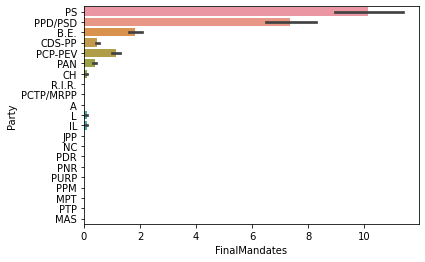

In [13]:
sns.barplot(y='Party',x='FinalMandates',data=df)
#PS party has heighest mandates followed by PPD/PSD party

In [16]:
df=df.drop(['TimeElapsed','time'],axis=1)

In [17]:
#convert string data to int
for col in df.columns:
    if(is_string_dtype(df[col])):
        labelEncoder=LabelEncoder()
        df[col]=labelEncoder.fit_transform(df[col])

In [18]:
df.describe()

,territoryName,totalMandates,availableMandates,numParishes,numParishesApproved,blankVotes,blankVotesPercentage,nullVotes,nullVotesPercentage,votersPercentage,...,pre.votersPercentage,pre.subscribedVoters,pre.totalVoters,Party,Mandates,Percentage,validVotesPercentage,Votes,Hondt,FinalMandates
count,21643.000000,21643.000000,21643.000000,21643.000000,21643.000000,21643.000000,21643.000000,21643.000000,21643.000000,21643.000000,...,21643.000000,2.164300e+04,2.164300e+04,21643.000000,21643.000000,21643.000000,21643.000000,2.164300e+04,21643.000000,21643.000000
mean,10.116851,11.544795,11.499284,309.956013,261.090237,8875.066673,2.621629,6148.068752,1.961471,51.983722,...,54.549372,6.378503e+05,3.594932e+05,10.096521,0.565495,4.968484,5.207232,1.585209e+04,1.126138,1.126138
std,5.985225,31.314567,31.738783,659.055911,583.377428,21484.874088,0.795289,14735.469269,0.375250,4.854380,...,4.964948,1.544418e+06,8.763729e+05,6.129654,4.421804,10.379967,10.881108,9.310605e+04,6.293552,6.872644
min,0.000000,0.000000,0.000000,54.000000,3.000000,19.000000,0.530000,39.000000,1.340000,35.980000,...,40.870000,6.383000e+03,3.215000e+03,0.000000,0.000000,0.020000,0.020000,1.000000e+00,0.000000,0.000000
25%,5.000000,1.000000,0.000000,75.000000,67.000000,1188.000000,2.230000,1094.000000,1.720000,50.290000,...,51.210000,1.289260e+05,6.964400e+04,4.000000,0.000000,0.220000,0.230000,2.360000e+02,0.000000,0.000000
50%,10.000000,4.000000,3.000000,147.000000,120.000000,2998.000000,2.640000,2232.000000,1.870000,53.130000,...,56.260000,2.284970e+05,1.102730e+05,11.000000,0.000000,0.620000,0.650000,7.900000e+02,0.000000,0.000000
75%,15.000000,9.000000,9.000000,242.000000,208.000000,6889.000000,2.980000,4121.000000,2.230000,54.550000,...,58.220000,3.933140e+05,2.276200e+05,15.000000,0.000000,3.010000,3.160000,4.510000e+03,0.000000,0.000000
max,20.000000,226.000000,226.000000,3092.000000,3092.000000,129599.000000,5.460000,88539.000000,3.350000,59.870000,...,62.580000,9.439701e+06,5.380451e+06,20.000000,106.000000,49.110000,51.420000,1.866407e+06,94.000000,106.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001E5F4237D60>,
      dtype=object)

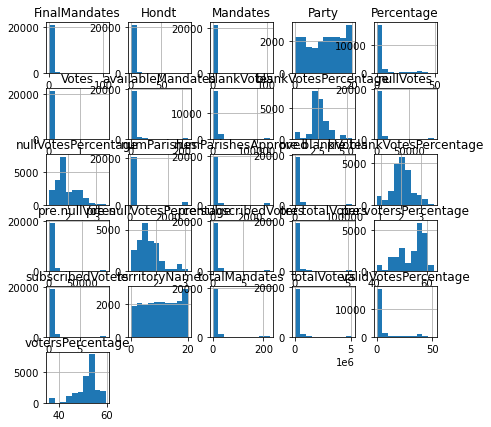

In [20]:
df.hist(figsize=(7,7))

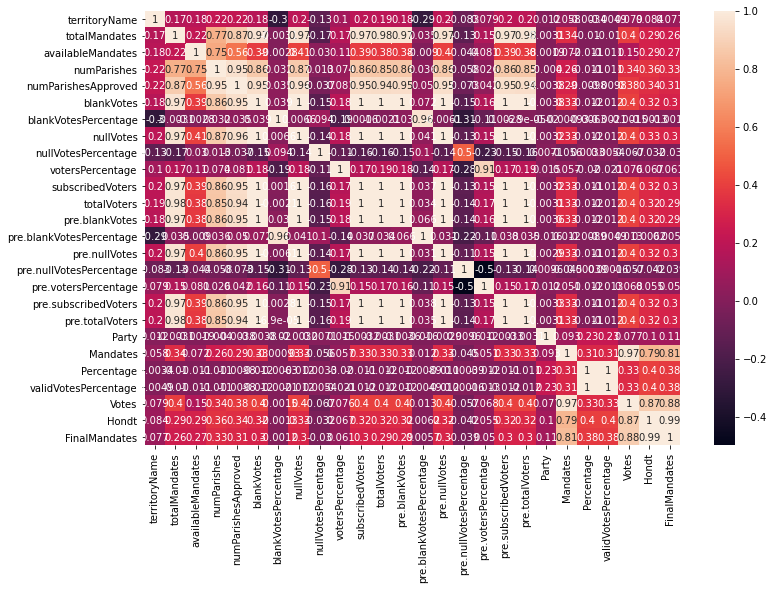

In [24]:
plt.figure(figsize=(12,8))
sns.heatmap(data=df.corr(),annot=True)

In [25]:
df.skew()

territoryName               -0.025884
totalMandates                5.150031
availableMandates            5.131572
numParishes                  3.920433
numParishesApproved          4.238343
blankVotes                   4.521940
blankVotesPercentage         0.069627
nullVotes                    4.520945
nullVotesPercentage          0.855419
votersPercentage            -1.158029
subscribedVoters             4.568797
totalVoters                  4.541364
pre.blankVotes               4.551489
pre.blankVotesPercentage     0.021609
pre.nullVotes                4.563235
pre.nullVotesPercentage      1.231109
pre.votersPercentage        -0.779289
pre.subscribedVoters         4.565085
pre.totalVoters              4.548030
Party                       -0.083536
Mandates                    16.576658
Percentage                   2.542328
validVotesPercentage         2.543122
Votes                       13.940573
Hondt                       11.489315
FinalMandates               12.402865
dtype: float

In [26]:
#remove skewed data where skewness is > 0.55
for col in df.columns:
    if(df[col].skew()>0.55):
        df[col]=np.log1p(df[col])

territoryName                  AxesSubplot(0.125,0.749828;0.110714x0.130172)
totalMandates               AxesSubplot(0.257857,0.749828;0.110714x0.130172)
availableMandates           AxesSubplot(0.390714,0.749828;0.110714x0.130172)
numParishes                 AxesSubplot(0.523571,0.749828;0.110714x0.130172)
numParishesApproved         AxesSubplot(0.656429,0.749828;0.110714x0.130172)
blankVotes                  AxesSubplot(0.789286,0.749828;0.110714x0.130172)
blankVotesPercentage           AxesSubplot(0.125,0.593621;0.110714x0.130172)
nullVotes                   AxesSubplot(0.257857,0.593621;0.110714x0.130172)
nullVotesPercentage         AxesSubplot(0.390714,0.593621;0.110714x0.130172)
votersPercentage            AxesSubplot(0.523571,0.593621;0.110714x0.130172)
subscribedVoters            AxesSubplot(0.656429,0.593621;0.110714x0.130172)
totalVoters                 AxesSubplot(0.789286,0.593621;0.110714x0.130172)
pre.blankVotes                 AxesSubplot(0.125,0.437414;0.110714x0.130172)

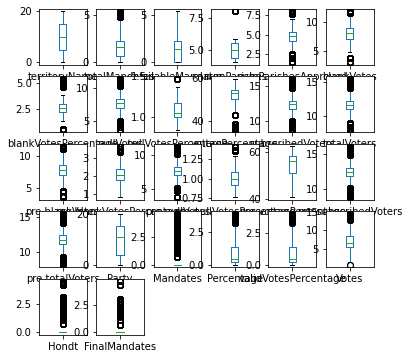

In [30]:
df.plot.box(layout=(5,6),figsize=(6,6),subplots=True)

In [31]:
#outlier present in dataset
#remove outlier
z=np.abs(zscore(df))
df=df[(z<3).all(axis=1)]
df.shape

(18542, 26)

In [33]:
x=df.drop('FinalMandates',axis=1)
y=df['FinalMandates']
print(x.shape,y.shape)

(18542, 25) (18542,)


In [34]:
standardScaler=StandardScaler()
x=standardScaler.fit_transform(x)
x

array([[-1.73259003, -1.45656148,  1.41538032, ...,  2.79828949,
         0.53502595,  4.84093126],
       [-1.73259003, -1.45656148,  1.41538032, ...,  2.70548672,
         0.48563849,  4.84093126],
       [-1.73259003, -1.45656148,  1.41538032, ...,  1.26789339,
        -0.3064239 ,  1.37071508],
       ...,
       [ 1.5053193 ,  0.74742626, -0.93537582, ..., -0.77654765,
        -0.62800663, -0.36439301],
       [ 1.5053193 ,  0.74742626, -0.93537582, ..., -0.78531212,
        -0.66359326, -0.36439301],
       [ 1.5053193 ,  0.74742626, -0.93537582, ..., -0.8489051 ,
        -1.02837416, -0.36439301]])

In [35]:
lr_reg=LinearRegression()
lasso=Lasso()
ridge=Ridge()
svr=SVR()
dtree_reg=DecisionTreeRegressor()
kn_reg=KNeighborsRegressor()
sgd_reg=SGDRegressor()
gradient_reg=GradientBoostingRegressor()
ada_reg=AdaBoostRegressor()
rand_reg=RandomForestRegressor()

In [36]:
models=[]
models.append(('LinearRegression',lr_reg))
models.append(('SVR',svr))
models.append(('DecisionTreeRegressor',dtree_reg))
models.append(('KNeighborsRegressor',kn_reg))
models.append(('SGDRegressor',sgd_reg))
models.append(('Gradient Boost Regressor',gradient_reg))
models.append(('Ada Boost Regressor',ada_reg ))
models.append(('RandomForestRegressor',rand_reg))

In [37]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=42)

In [38]:
#finding and storing matrix model wise
cross_val_list=[]
mse_list=[]
model_name_list=[]
mae_list=[]
r2_score_list=[]
score_list=[]

for reg_name,reg_obj in models:
    reg_obj.fit(x_train,y_train)
    y_pred=reg_obj.predict(x_test)
    cross_val_list.append(cross_val_score(reg_obj,x,y,cv=10,scoring='r2').mean())
    r2_score_list.append(r2_score(y_test,y_pred))
    mse_list.append(mean_squared_error(y_test,y_pred))
    mae_list.append(mean_absolute_error(y_test,y_pred))
    score_list.append(reg_obj.score(x_train,y_train))
    model_name_list.append(reg_name)
    

In [39]:
df_matrix=pd.DataFrame({'Estimator_Name':model_name_list,'cross_val_Score':cross_val_list,'r2_score':r2_score_list,'mse':mse_list,'mae':mae_list,'train_score':score_list})
df_matrix

,Estimator_Name,cross_val_Score,r2_score,mse,mae,train_score
0,LinearRegression,0.980108,0.980959,0.003026,0.017529,0.975100
1,SVR,0.970855,0.973152,0.004266,0.049305,0.971663
2,DecisionTreeRegressor,0.996310,0.997648,0.000374,0.000621,1.000000
3,KNeighborsRegressor,0.989339,0.996859,0.000499,0.002177,0.997906
4,SGDRegressor,0.979647,0.980938,0.003029,0.016460,0.974537
5,Gradient Boost Regressor,0.992816,0.992589,0.001178,0.007723,0.994051
6,Ada Boost Regressor,0.968035,0.962631,0.005938,0.029655,0.961956
7,RandomForestRegressor,0.997486,0.997855,0.000341,0.001106,0.999919


In [40]:
#RandomForestRegressor performing good
joblib.dump(rand_reg,'Election_Result_Prediction.pkl')

['Election_Result_Prediction.pkl']